**Importing the modules**

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
import statsmodels.api as sm

In [51]:
sns.set()

***Reading the raw file***

In [52]:
raw_data =pd.read_csv("train.csv")
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


***To see what all of it contains***

In [53]:
raw_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Moore, Mr. Leonard Charles",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Dropping the irrevant coloumns. **
Note: Below i had seen how many null values each has and found feature 'Age' to have around 687 null values so i dropped it here only.

In [54]:
new_data = raw_data.drop(['Name','Ticket','Cabin','Age'],axis=1)
new_data.describe(include='all')

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891.000000,891.000000,891.000000,889
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,3
top,NaN,NaN,NaN,male,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,577,NaN,NaN,NaN,644
mean,446.000000,0.383838,2.308642,NaN,0.523008,0.381594,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,1.102743,0.806057,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000,NaN


***To check the null values:***

In [55]:
new_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

***Dropping the null values***

In [56]:
data = new_data.dropna(axis=0)
data.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [57]:
data.describe(include= 'all')

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889,889.000000,889.000000,889.000000,889
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,3
top,NaN,NaN,NaN,male,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,577,NaN,NaN,NaN,644
mean,446.000000,0.382452,2.311586,NaN,0.524184,0.382452,32.096681,NaN
std,256.998173,0.486260,0.834700,NaN,1.103705,0.806761,49.697504,NaN
min,1.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,NaN
25%,224.000000,0.000000,2.000000,NaN,0.000000,0.000000,7.895800,NaN
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200,NaN
75%,668.000000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000,NaN


***Plotting various features against the independent feature:***
Note: Does not include the dummy variables

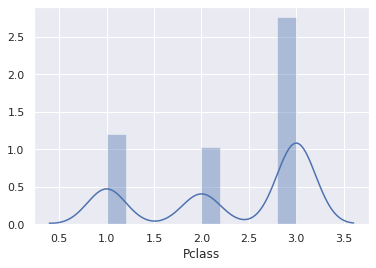

In [58]:
sns.distplot(data['Pclass'])

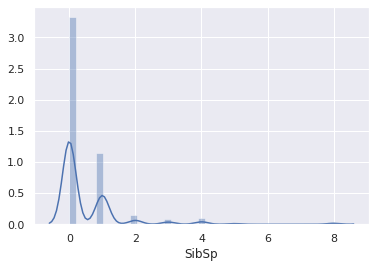

In [59]:
sns.distplot(data['SibSp'])

As we can see this is not normally distributed and has outliers, so  trying to bring it to normal.

In [60]:
q=data['SibSp'].quantile(0.99)
data1=data[data['SibSp']<q]
data1.describe(include='all')

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
count,877.000000,877.000000,877.000000,877,877.000000,877.000000,877.000000,877
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,3
top,NaN,NaN,NaN,male,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,569,NaN,NaN,NaN,632
mean,446.337514,0.387685,2.302166,NaN,0.438997,0.360319,31.713340,NaN
std,256.464868,0.487500,0.836473,NaN,0.816487,0.789586,49.910603,NaN
min,1.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,NaN
25%,226.000000,0.000000,2.000000,NaN,0.000000,0.000000,7.895800,NaN
50%,447.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.400000,NaN
75%,667.000000,1.000000,3.000000,NaN,1.000000,0.000000,30.070800,NaN


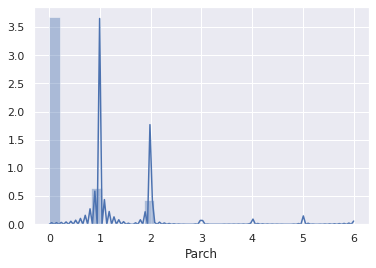

In [61]:
sns.distplot(data['Parch'])

Above plot is a very disturbed plot, so have kept it for further improvement.

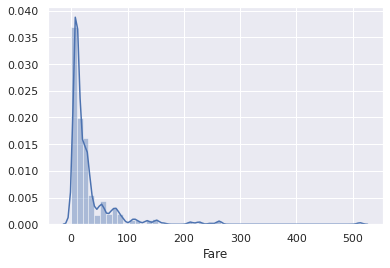

In [62]:
sns.distplot(data['Fare'])

In [63]:
q=data['Fare'].quantile(0.99)
data1=data[data['Fare']<q]
data1.describe(include='all')

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
count,880.000000,880.000000,880.00000,880,880.000000,880.000000,880.000000,880
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,3
top,NaN,NaN,NaN,male,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,573,NaN,NaN,NaN,640
mean,446.436364,0.378409,2.32500,NaN,0.513636,0.369318,28.886604,NaN
std,256.998334,0.485266,0.82829,NaN,1.097021,0.791717,36.529792,NaN
min,1.000000,0.000000,1.00000,NaN,0.000000,0.000000,0.000000,NaN
25%,223.750000,0.000000,2.00000,NaN,0.000000,0.000000,7.895800,NaN
50%,447.500000,0.000000,3.00000,NaN,0.000000,0.000000,14.427100,NaN
75%,667.250000,1.000000,3.00000,NaN,1.000000,0.000000,30.500000,NaN


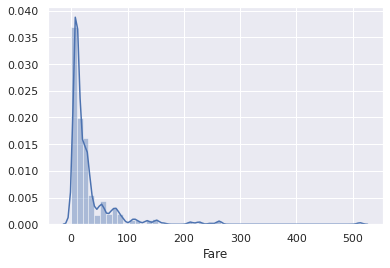

In [64]:
sns.distplot(data['Fare'])

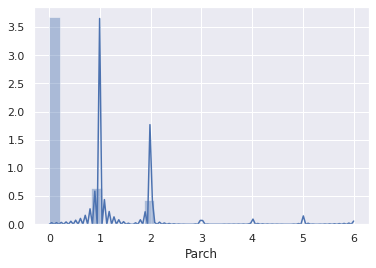

In [65]:
data2=data1[data1['Parch']<5]
sns.distplot(data['Parch'])

Whatever is cleaned is included as the new data.

In [66]:
data_cleaned=data2.reset_index(drop=True)
data_cleaned.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000
mean,446.234554,0.379863,2.320366,0.512586,0.336384,28.845036
std,256.375858,0.485630,0.829232,1.100016,0.686228,36.647915
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,224.250000,0.000000,2.000000,0.000000,0.000000,7.895800
50%,446.500000,0.000000,3.000000,0.000000,0.000000,14.054150
75%,666.750000,1.000000,3.000000,1.000000,0.000000,30.000000
max,891.000000,1.000000,3.000000,8.000000,4.000000,247.520800


***Making the final plots***

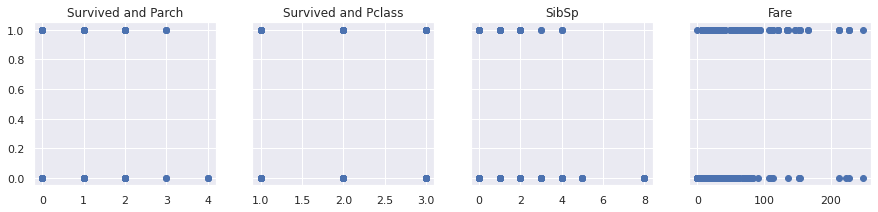

In [67]:
f,  (ax1,ax2,ax4,ax6) = plt.subplots(1,4, sharey= True, figsize=(15,3))
ax1.scatter(data_cleaned['Parch'],data_cleaned['Survived'])
ax1.set_title('Survived and Parch')
ax2.scatter(data_cleaned['Pclass'],data_cleaned['Survived'])
ax2.set_title('Survived and Pclass')
ax4.scatter(data_cleaned['SibSp'],data_cleaned['Survived'])
ax4.set_title('Survived' and 'SibSp')
#ax5.scatter(data_cleaned['PassengerID'],data_cleaned['Survived'])
#ax5.set_title['Survived' and 'Parch']
ax6.scatter(data_cleaned['Fare'],data_cleaned['Survived'])
ax6.set_title('Survived' and 'Fare')
plt.show()


In [68]:
data_cleaned.describe(include='all')

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
count,874.000000,874.000000,874.000000,874,874.000000,874.000000,874.000000,874
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,3
top,NaN,NaN,NaN,male,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,572,NaN,NaN,NaN,635
mean,446.234554,0.379863,2.320366,NaN,0.512586,0.336384,28.845036,NaN
std,256.375858,0.485630,0.829232,NaN,1.100016,0.686228,36.647915,NaN
min,1.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,NaN
25%,224.250000,0.000000,2.000000,NaN,0.000000,0.000000,7.895800,NaN
50%,446.500000,0.000000,3.000000,NaN,0.000000,0.000000,14.054150,NaN
75%,666.750000,1.000000,3.000000,NaN,1.000000,0.000000,30.000000,NaN


***Time for making the categorical variables the dummies:***

In [69]:
data_with_dummies = pd.get_dummies(data_cleaned)
data_with_dummies.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,0,7.2500,0,1,0,0,1
1,2,1,1,1,0,71.2833,1,0,1,0,0
2,3,1,3,0,0,7.9250,1,0,0,0,1
3,4,1,1,1,0,53.1000,1,0,0,0,1
4,5,0,3,0,0,8.0500,0,1,0,0,1


In [70]:
data_with_dummies.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype=object)

***Final plotting with all the variables:***

In [71]:
y = data_with_dummies['Survived']
x1 = data_with_dummies[['PassengerId', 'Pclass', 'SibSp', 'Parch',
       'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S']]


***Fitting into the regression model:***

In [72]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.456486
         Iterations 8


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  874
Model:                          Logit   Df Residuals:                      865
Method:                           MLE   Df Model:                            8
Date:                Mon, 14 Sep 2020   Pseudo R-squ.:                  0.3125
Time:                        07:06:00   Log-Likelihood:                -398.97
converged:                       True   LL-Null:                       -580.33
Covariance Type:            nonrobust   LLR p-value:                 1.734e-73
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.0904        nan        nan        nan         nan         nan
PassengerId     0.0001      0.000      0.365      0.715      -0.001       0.001
Pclass         -0.8871      0.142     -6.239      0.000      -1.166      -0.608
SibSp          -0.2736      0.106     -2.576      0.010      -0.482      -0.065
Parch           0.1439      0.147      0.978      0.328      -0.145       0.432
Fare            0.0002      0.003      0.055      0.956      -0.007       0.007
Sex_female      1.8911   1.63e+06   1.16e-06      1.000    -3.2e+06     3.2e+06
Sex_male       -0.8007   1.63e+06   -4.9e-07      1.000    -3.2e+06     3.2e+06
Embarked_C      0.5346   5.36e+06   9.98e-08      1.000   -1.05e+07    1.05e+07
Embarked_Q      0.4630   5.36e+06   8.65e-08      1.000   -1.05e+07    1.05e+07
Embarked_S      0.0928   5.36e+06   1.73e-08      1.000   -1.05e+07    1.05e+07
===============================================================================
"""

In [73]:
results_log.predict()

array([0.07237558, 0.91444712, 0.6022904 , 0.87260729, 0.09308649,
       0.12941112, 0.37898123, 0.04971016, 0.66909681, 0.81387037,
       0.57149928, 0.89969043, 0.09317236, 0.60265246, 0.78671723,
       0.05461238, 0.1999069 , 0.53627991, 0.70241758, 0.2003613 ,
       0.19998822, 0.68734101, 0.37876183, 0.43620369, 0.13798984,
       0.68749877, 0.0933526 , 0.48660401, 0.91584751, 0.68760273,
       0.20015668, 0.42155908, 0.3178341 , 0.13814118, 0.09344116,
       0.46862543, 0.64303412, 0.5365745 , 0.73806184, 0.13824701,
       0.85440425, 0.68793548, 0.09352733, 0.1021818 , 0.68801209,
       0.08519879, 0.53725016, 0.03859938, 0.09358799, 0.91503291,
       0.73853912, 0.52492612, 0.37971927, 0.78741629, 0.13845925,
       0.79035588, 0.03414591, 0.13850474, 0.31987152, 0.05741652,
       0.48768359, 0.12397263, 0.78762895, 0.09376639, 0.40535544,
       0.05650286, 0.20091057, 0.34320783, 0.20287034, 0.10925948,
       0.09462186, 0.09384465, 0.09385941, 0.0938727 , 0.25192

***Checking Predictions:***

In [74]:
np.array(data['Survived'])

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

In [75]:
results_log.pred_table()

array([[466.,  76.],
       [102., 230.]])

***Getting the confusion Matrix:***

In [76]:
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = { 'Predicted 0', 'Predicted 1'}
cm_df = cm_df.rename(index={0:'Actual 0', 1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,466.0,76.0
Actual 1,102.0,230.0


***Checking the accuracy:***

In [77]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.7963386727688787

Another method of trying Logistic Regression:

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,x,y,cv=5)
print(cv)
print(cv.mean())

[0.81714286 0.78857143 0.78285714 0.78285714 0.81609195]
0.7975041050903121


Using decision tree:

In [99]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,x,y,cv=5)
print(cv)
print(cv.mean())

[0.64571429 0.73714286 0.78285714 0.81142857 0.77011494]
0.7494515599343184


Using a Gaussian approach:

In [101]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
cv = cross_val_score(gnb,x,y,cv=5)
print(cv)
print(cv.mean())

[0.76       0.79428571 0.78857143 0.8        0.79885057]
0.7883415435139574


K Neighbors:

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
cv = cross_val_score(knn,x,y,cv=5)
print(cv)
print(cv.mean())


[0.62285714 0.48       0.48       0.50285714 0.67816092]
0.552775041050903


Using SVC

In [104]:
from sklearn.svm import SVC
svc = SVC(probability = True)
cv = cross_val_score(svc,x,y,cv=5)
print(cv)
print(cv.mean())

[0.62285714 0.62857143 0.65714286 0.63428571 0.64942529]
0.6384564860426929


Using Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,x,y,cv=5)
print(cv)
print(cv.mean())

[0.64       0.76571429 0.80571429 0.81714286 0.81609195]
0.7689326765188834


Note: For some Classifiers the accuracy is extremely low as because scaling is not done.
Choosed not to scale because of the presence of a large number of dummies. 